<a href="https://colab.research.google.com/github/kamakshidasan/anice/blob/main/4%20Container%20With%20Most%20Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://leetcode.com/problems/container-with-most-water/

#Question

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

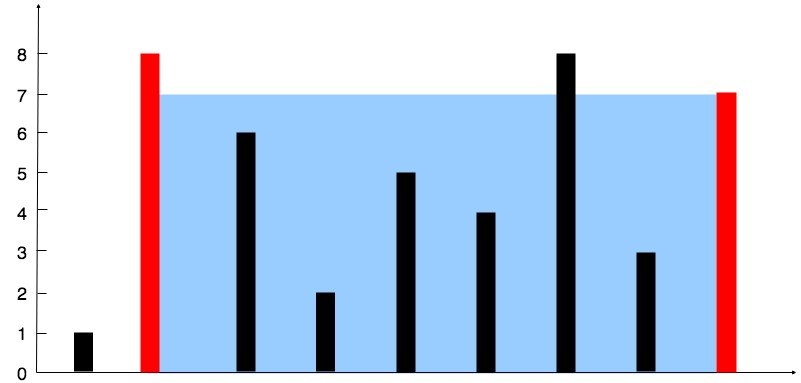

Input: height = [1,8,6,2,5,4,8,3,7]\
Output: 49\
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.

# Solution

Yesterday while solving 3Sum, I had this idea.

- You can reduce the search space by half, if it is sufficient that you can only look at j > i solution space
-Here I tried to do exactly that

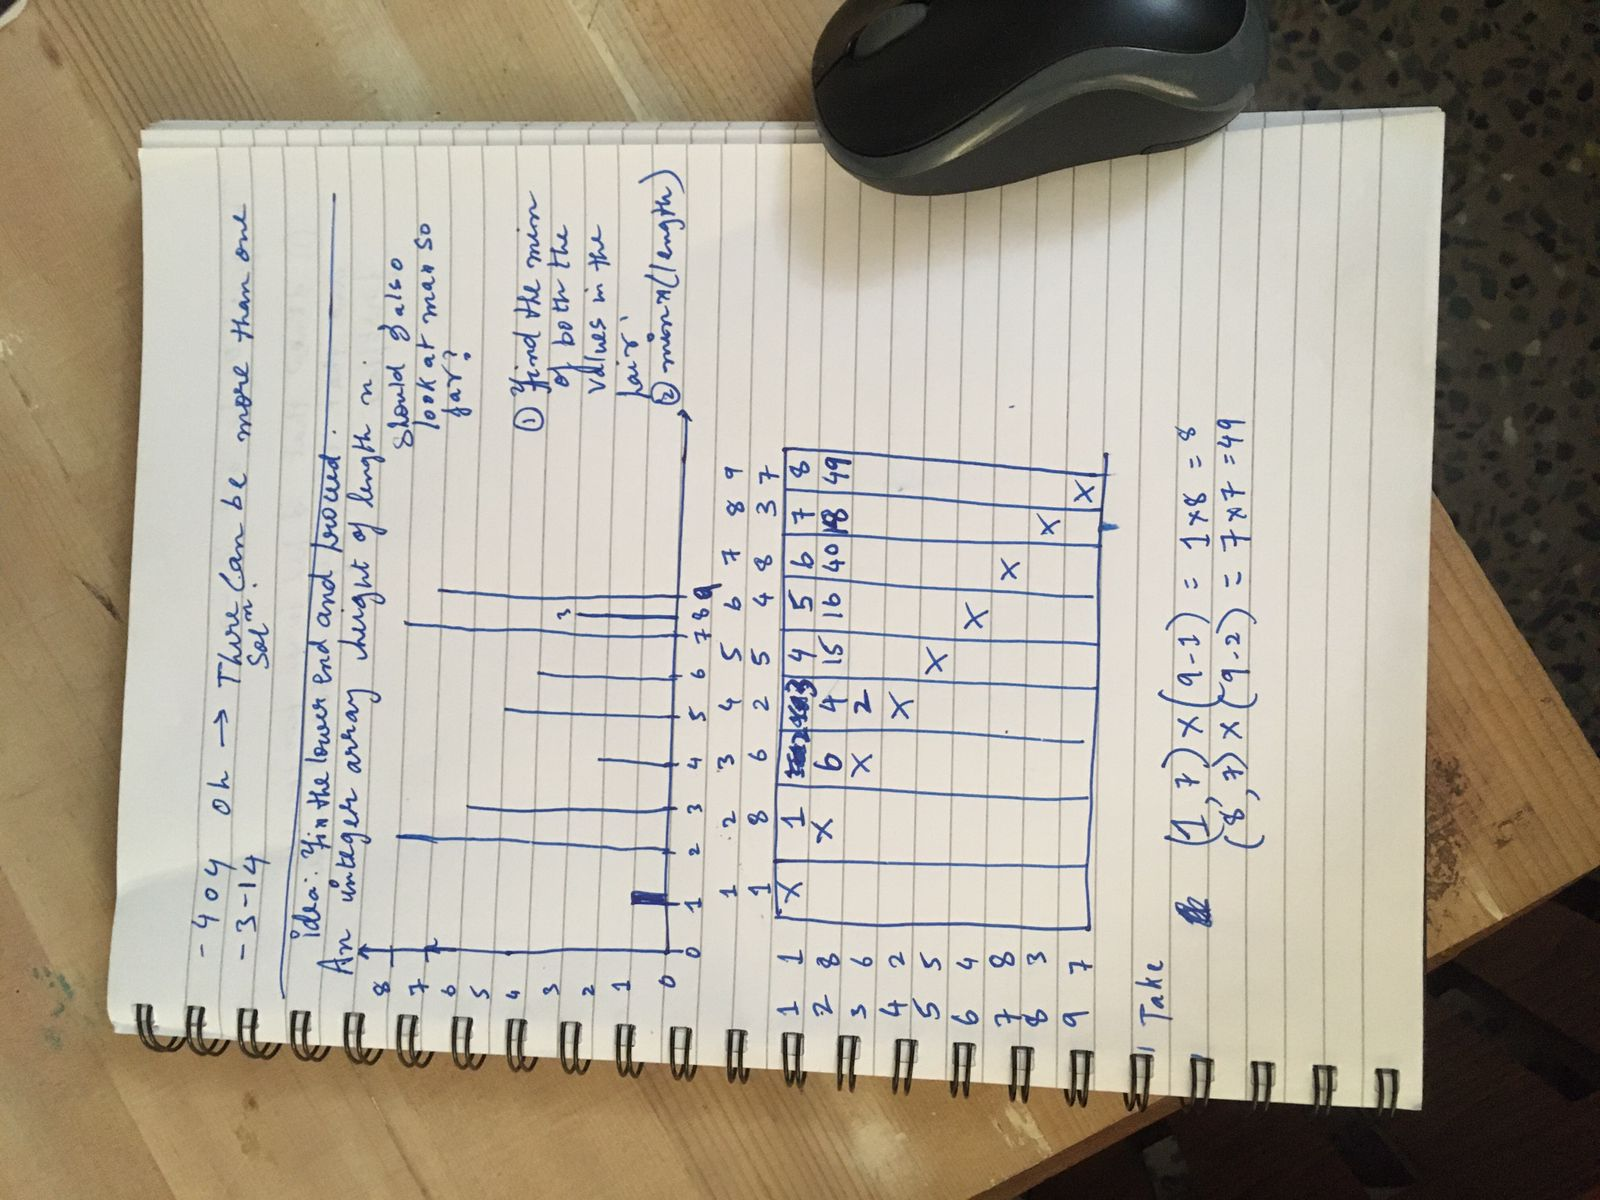

- Then I noticed that just only two points are necessary for the solution
 - The values at the left and right index
 - The gap between the left and right index

 - If I took the minimum value at left and right index, and multiplied it with the distance between them, I would get a rectangle.
 - Then I tried to find the maximum of all such values in the upper right triangle of the matrix



In [ ]:
class Solution(object):
    def maxArea(self, height):
        answer = 0
        for i, start in enumerate(height):
            for j in range(i+1, len(height)):
                end = height[j]
                value = min(start, end) * (j-i)
                answer = max(answer, value)
        return answer

For a really large input, while it gave me a correct solution, it also gave me a TLE.

Turns out mine is the brute force solution! But it is *O(n^2)*🤷


#Solution 2

- Two Pointer Solution

 - Keep the same idea of left and right pointers at the boundary, but the main idea is:
  - Whenever left pointer is lesser than right pointer, then move left pointer one ahead
  - Whenever right pointer is lesser than the left pointer, then move right pointer one before
  - However you move the pointer, the width cannot increase

In [ ]:
class Solution(object):
    def maxArea(self, height):
        
        answer = 0
        left = 0
        right = len(height) - 1
        
        while(left < right):
            left_height = height[left]
            right_height = height[right]
            
            current = min(left_height, right_height) * (right - left)
            answer = max(answer, current)
            
            if left_height < right_height:
                left += 1
            else:
                right -= 1
                
        return answer

# Takeaway

- Whenever you see the upper triangular matrix for an iteration j > i

 - Make sure to always check if a two pointer approach is possible